## Plot differences in SPL between belugas and narwhals

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

### Load Data

In [2]:
# import beluga and narwhal sound pressure level (SPL) statistics
csv_dir = 'data/SPL_difference/1hr/model_input/'

# 2013 training dataset
disk_spec_10kHz = pd.read_csv(csv_dir + 'training_data_spl_diff.csv')

# Kong Oscar
kong_spec_0kHz  = pd.read_csv(csv_dir + 'testing_kong_data_spl_diff_0kHz_highpass.csv')
# kong_spec_20kHz = pd.read_csv(csv_dir + 'testing_kong_data_spl_diff_20kHz_highpass.csv')

# Fisher Islands
fish_spec_0kHz  = pd.read_csv(csv_dir + 'testing_fish_data_spl_diff_0kHz_highpass.csv')
# fish_spec_20kHz = pd.read_csv(csv_dir + 'testing_fish_data_spl_diff_20kHz_highpass.csv')

In [3]:
# join dataframes from both sites
soundtrap_spec_0kHz  = pd.concat([kong_spec_0kHz, fish_spec_0kHz])
# soundtrap_spec_20kHz = pd.concat([kong_spec_20kHz, fish_spec_20kHz])

In [7]:
## 2013 data
narwhal_2013_spec_10kHz = disk_spec_10kHz[disk_spec_10kHz.species==85]
beluga_2013_spec_10kHz  = disk_spec_10kHz[disk_spec_10kHz.species==45]

## 0 kHz highpass
narwhal_spec_0kHz = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X085"]
beluga_spec_0kHz  = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="X045"]
noise_spec_0kHz   = soundtrap_spec_0kHz[soundtrap_spec_0kHz.species=="NOISE"]

# ## 20 kHz highpass
# narwhal_spec_20kHz = soundtrap_spec_20kHz[soundtrap_spec_20kHz.species=="X085"]
# beluga_spec_20kHz  = soundtrap_spec_20kHz[soundtrap_spec_20kHz.species=="X045"]
# noise_spec_20kHz   = soundtrap_spec_20kHz[soundtrap_spec_20kHz.species=="NOISE"]

In [8]:
## prepare dataframes to plot violin plots

## 2013 dataset
df_narwhal_2013 = pd.melt(narwhal_2013_spec_10kHz, id_vars='eventId',\
                     value_vars=narwhal_2013_spec_10kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
                     var_name='band', value_name='dB')

df_beluga_2013 = pd.melt(beluga_2013_spec_10kHz, id_vars='eventId',\
                    value_vars=beluga_2013_spec_10kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
                    var_name='band', value_name='dB')

## 0 kHz highpass
df_narwhal_0kHz = pd.melt(narwhal_spec_0kHz, id_vars='eventId',\
                     value_vars=narwhal_spec_0kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
                     var_name='band', value_name='dB')

df_beluga_0kHz = pd.melt(beluga_spec_0kHz, id_vars='eventId',\
                    value_vars=beluga_spec_0kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
                    var_name='band', value_name='dB')

df_noise_0kHz = pd.melt(noise_spec_0kHz, id_vars='eventId',\
                    value_vars=noise_spec_0kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
                    var_name='band', value_name='dB')

## 20 kHz highpass
# df_narwhal_20kHz = pd.melt(narwhal_spec_20kHz, id_vars='eventId',\
#                      value_vars=narwhal_spec_20kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
#                      var_name='band', value_name='dB')

# df_beluga_20kHz = pd.melt(beluga_spec_20kHz, id_vars='eventId',\
#                     value_vars=beluga_spec_20kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
#                     var_name='band', value_name='dB')

# df_noise_20kHz = pd.melt(noise_spec_20kHz, id_vars='eventId',\
#                     value_vars=noise_spec_20kHz.loc[:,'spl_diff_16to23_dB':'spl_diff_23to46_dB'],\
#                     var_name='band', value_name='dB')

In [9]:
freq_array_reson = np.arange(0,250000,976.5625)
freq_array_soundtrap = np.arange(0,72000,281.25)

narwhal_reson_avSpec = narwhal_2013_spec_10kHz.loc[:,'X1':'X256'] + 206 # add clipping level
beluga_reson_avSpec = beluga_2013_spec_10kHz.loc[:,'X1':'X256'] + 206

beluga_0kHz_avSpec = beluga_spec_0kHz.loc[:,'X1':'X256'] + 173 # add clipping level
narwhal_0kHz_avSpec = narwhal_spec_0kHz.loc[:,'X1':'X256'] + 173 # add clipping level
noise_0kHz_avSpec = noise_spec_0kHz.loc[:,'X1':'X256'] + 173 # add clipping level

# beluga_20kHz_avSpec = beluga_spec_20kHz.loc[:,'X1':'X256'] + 173 # add clipping level
# narwhal_20kHz_avSpec = narwhal_spec_20kHz.loc[:,'X1':'X256'] + 173 # add clipping level
# noise_20kHz_avSpec = noise_spec_20kHz.loc[:,'X1':'X256'] + 173 # add clipping level

Calculate average spectra for each group across events

In [10]:
def calculate_avg_spec(spec_df):
    # convert to linear scale and calculate mean across all events (rows)
    avSpec_all_linear = (10**(spec_df/20)).mean(axis=0)
    # convert back to dB (log scale)
    avSpec_all = 20*np.log10(avSpec_all_linear)
    return(avSpec_all)

In [11]:
## beluga events
beluga_reson_avSpec_all = calculate_avg_spec(beluga_reson_avSpec)
narwhal_reson_avSpec_all = calculate_avg_spec(narwhal_reson_avSpec)

beluga_0kHz_avSpec_all = calculate_avg_spec(beluga_0kHz_avSpec)
narwhal_0kHz_avSpec_all = calculate_avg_spec(narwhal_0kHz_avSpec)
noise_0kHz_avSpec_all = calculate_avg_spec(noise_0kHz_avSpec)

# beluga_20kHz_avSpec_all = calculate_avg_spec(beluga_20kHz_avSpec)
# narwhal_20kHz_avSpec_all = calculate_avg_spec(narwhal_20kHz_avSpec)
# noise_20kHz_avSpec_all = calculate_avg_spec(noise_20kHz_avSpec)

### Plot 0kHz highpass data

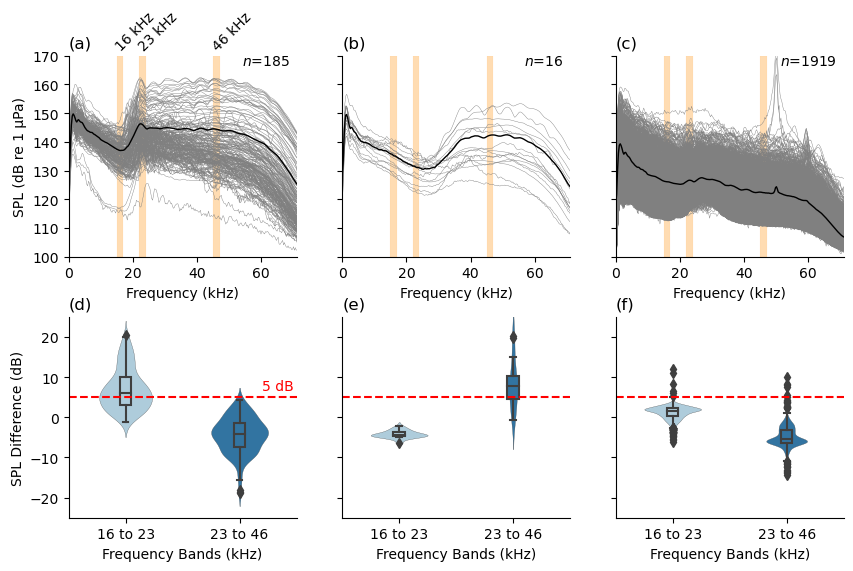

In [33]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_0kHz_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, narwhal_0kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_soundtrap/1000,narwhal_0kHz_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_0kHz_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, beluga_0kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,beluga_0kHz_avSpec_all,'k', linewidth=1)
    
## noise events
for i in range(len(noise_0kHz_avSpec.iloc[:,0])):
    ax3.plot(freq_array_soundtrap/1000, noise_0kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax3.plot(freq_array_soundtrap/1000,noise_0kHz_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal_0kHz['band'],y=df_narwhal_0kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_0kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)
ax4.set_ylabel("SPL Difference (dB)")
ax4.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga_0kHz['band'],y=df_beluga_0kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax5);
sns.boxplot(x='band', y='dB', data=df_beluga_0kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax5)

sns.violinplot(x=df_noise_0kHz['band'],y=df_noise_0kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5, ax=ax6);
sns.boxplot(x='band', y='dB', data=df_noise_0kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax6)

for ax in (ax1,ax2, ax3):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(100,170)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(15, 17, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(22, 24, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(45, 47, alpha=0.3, color='darkorange',linewidth=0.1);

for ax in (ax4,ax5,ax6):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,25)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax3,ax5,ax6):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)","(e)","(f)"]
for ax, label in zip([ax1,ax2,ax3,ax4,ax5,ax6],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(69,168,'$\it{n}$=' + str(len(narwhal_spec_0kHz['eventId'])), ha='right', va='center')
ax2.text(69,168,'$\it{n}$=' + str(len(beluga_spec_0kHz['eventId'])),  ha='right', va='center')
ax3.text(69,168,'$\it{n}$=' + str(len(noise_spec_0kHz['eventId'])),   ha='right', va='center')

# add frequency band numbers
ax1.text(14,171,'16 kHz', ha='left', va='bottom', rotation=45);
ax1.text(21,171,'23 kHz', ha='left', va='bottom', rotation=45);
ax1.text(44,171,'46 kHz', ha='left', va='bottom', rotation=45);

# ax1.text(60,181,'$\it{n}$ det=' + f"{narwhal_spec['n_dets'].sum():,}", ha='left', va='center')
# ax2.text(60,181,'$\it{n}$ det=' + f"{beluga_spec['n_dets'].sum():,}",  ha='left', va='center')
# ax3.text(60,181,'$\it{n}$ det=' + f"{noise_spec['n_dets'].sum():,}",   ha='left', va='center')

ax4.text(1.2,6,'5 dB', ha='left', va='bottom', color='r');

plt.savefig('figures/spl_diff_fig_soundtrap.png', bbox_inches='tight', dpi=300, facecolor='white')

### Plot 20kHz highpass data

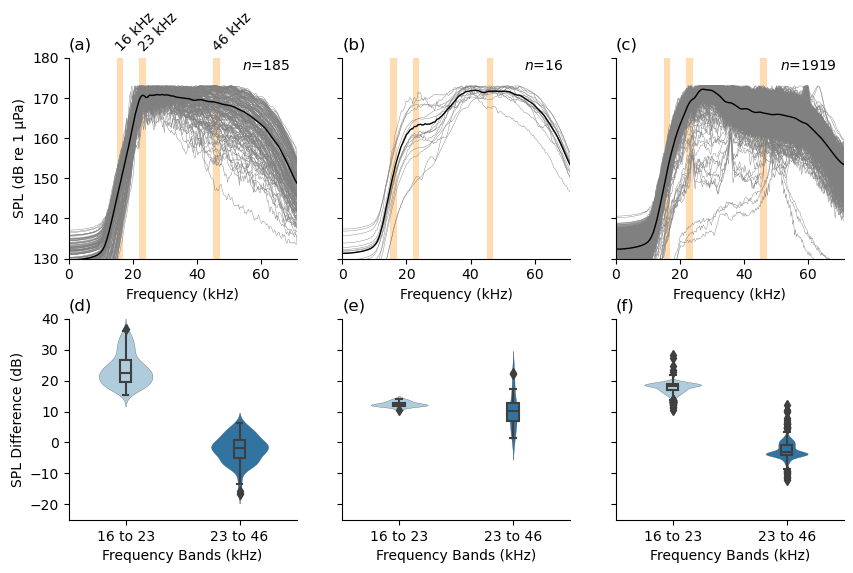

In [40]:
plt.rcParams['figure.figsize'] = (10,6)
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_20kHz_avSpec.iloc[:,0])):
    ax1.plot(freq_array_soundtrap/1000, narwhal_20kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_soundtrap/1000,narwhal_20kHz_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_20kHz_avSpec.iloc[:,0])):
    ax2.plot(freq_array_soundtrap/1000, beluga_20kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_soundtrap/1000,beluga_20kHz_avSpec_all,'k', linewidth=1)
    
## noise events
for i in range(len(noise_20kHz_avSpec.iloc[:,0])):
    ax3.plot(freq_array_soundtrap/1000, noise_20kHz_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax3.plot(freq_array_soundtrap/1000,noise_20kHz_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal_20kHz['band'],y=df_narwhal_20kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_narwhal_20kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)
ax4.set_ylabel("SPL Difference (dB)")
ax4.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga_20kHz['band'],y=df_beluga_20kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax5);
sns.boxplot(x='band', y='dB', data=df_beluga_20kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax5)

sns.violinplot(x=df_noise_20kHz['band'],y=df_noise_20kHz['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5, ax=ax6);
sns.boxplot(x='band', y='dB', data=df_noise_20kHz, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax6)

for ax in (ax1,ax2, ax3):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(130,180)
    ax.set_xlim(0,71)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(15, 17, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(22, 24, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(45, 47, alpha=0.3, color='darkorange',linewidth=0.1);

for ax in (ax4,ax5,ax6):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    # ax.axhline(y = 3, color = 'r', linestyle = '--')

for ax in (ax2,ax3,ax5,ax6):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)","(e)","(f)"]
for ax, label in zip([ax1,ax2,ax3,ax4,ax5,ax6],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(69,178,'$\it{n}$=' + str(len(narwhal_spec_20kHz['eventId'])), ha='right', va='center')
ax2.text(69,178,'$\it{n}$=' + str(len(beluga_spec_20kHz['eventId'])),  ha='right', va='center')
ax3.text(69,178,'$\it{n}$=' + str(len(noise_spec_20kHz['eventId'])),   ha='right', va='center')

# add frequency band numbers
ax1.text(14,181,'16 kHz', ha='left', va='bottom', rotation=45);
ax1.text(21,181,'23 kHz', ha='left', va='bottom', rotation=45);
ax1.text(44,181,'46 kHz', ha='left', va='bottom', rotation=45);

# ax1.text(60,181,'$\it{n}$ det=' + f"{narwhal_spec['n_dets'].sum():,}", ha='left', va='center')
# ax2.text(60,181,'$\it{n}$ det=' + f"{beluga_spec['n_dets'].sum():,}",  ha='left', va='center')
# ax3.text(60,181,'$\it{n}$ det=' + f"{noise_spec['n_dets'].sum():,}",   ha='left', va='center')

# ax4.text(1.2,4,'3 dB', ha='left', va='bottom', color='r');

# plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')

### Training and SoundTrap mean spectra

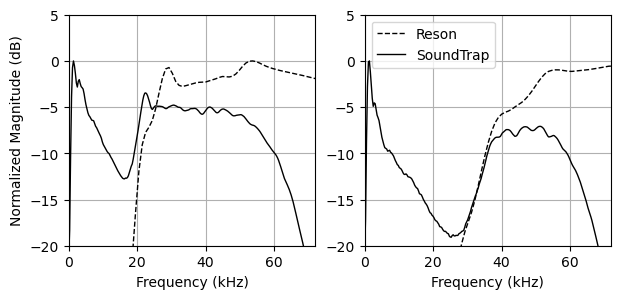

In [32]:
plt.rcParams['figure.figsize'] = (7,3)
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(hspace=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all-np.max(narwhal_reson_avSpec_all),'k', linewidth=1, linestyle='dashed')
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all-np.max(beluga_reson_avSpec_all),'k', linewidth=1, linestyle='dashed', label='Reson')

ax1.plot(freq_array_soundtrap/1000,narwhal_0kHz_avSpec_all-np.max(narwhal_0kHz_avSpec_all),'k', linewidth=1)
ax2.plot(freq_array_soundtrap/1000,beluga_0kHz_avSpec_all-np.max(beluga_0kHz_avSpec_all),'k', linewidth=1, label='SoundTrap')

ax1.set_ylabel("Normalized Magnitude (dB)")

for ax in (ax1,ax2):
    ax.set_ylim(-20,5)
    ax.set_xlim(0,72)
    ax.grid()
    ax.set_xlabel("Frequency (kHz)")

ax2.legend(loc='upper left');

### Training dataset

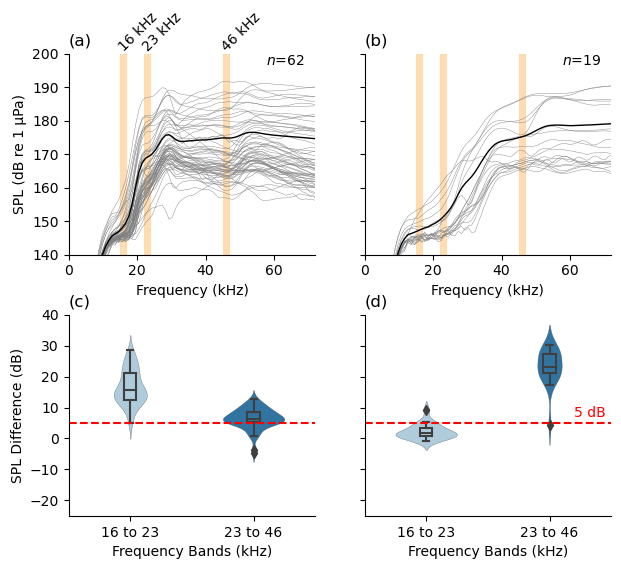

In [21]:
plt.rcParams['figure.figsize'] = (7,6)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal_2013['band'],y=df_narwhal_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_narwhal_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga_2013['band'],y=df_beluga_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_beluga_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    # ax.set_ylim(-70,0)
    ax.set_ylim(140,200)
    ax.set_xlim(0,72)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(15, 17, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(22, 24, alpha=0.3, color='darkorange',linewidth=0.1);
    ax.axvspan(45, 47, alpha=0.3, color='darkorange',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(69,198,'$\it{n}$=' + str(len(narwhal_2013_spec_10kHz['eventId'])), ha='right', va='center')
ax2.text(69,198,'$\it{n}$=' + str(len(beluga_2013_spec_10kHz['eventId'])),  ha='right', va='center')

# add frequency band numbers
ax1.text(14,200,'16 kHz', ha='left', va='bottom', rotation=45);
ax1.text(21,200,'23 kHz', ha='left', va='bottom', rotation=45);
ax1.text(44,200,'46 kHz', ha='left', va='bottom', rotation=45);

ax4.text(1.2,6,'5 dB', ha='left', va='bottom', color='r');

plt.savefig('figures/spl_diff_fig_reson.png', bbox_inches='tight', dpi=300, facecolor='white')

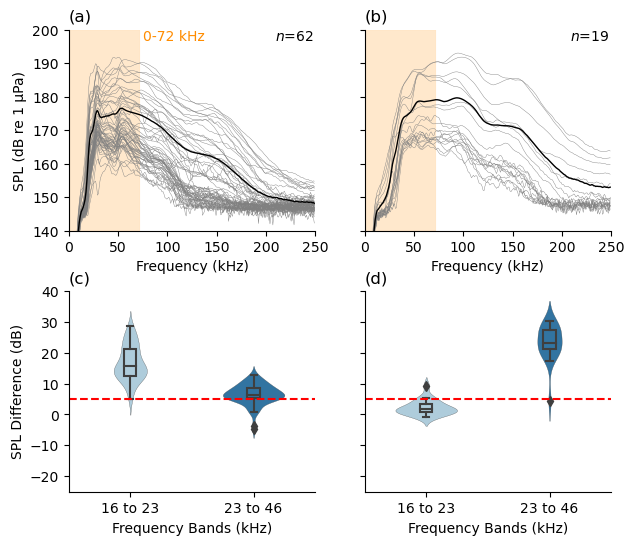

In [182]:
plt.rcParams['figure.figsize'] = (7,6)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.3)

## top two plots: mean power spectra for each species

## narwhal events
for i in range(len(narwhal_reson_avSpec.iloc[:,0])):
    ax1.plot(freq_array_reson/1000, narwhal_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax1.plot(freq_array_reson/1000,narwhal_reson_avSpec_all,'k', linewidth=1)

## beluga events
for i in range(len(beluga_reson_avSpec.iloc[:,0])):
    ax2.plot(freq_array_reson/1000, beluga_reson_avSpec.iloc[i,:],'gray',linewidth=0.3)
ax2.plot(freq_array_reson/1000,beluga_reson_avSpec_all,'k', linewidth=1)

ax1.set_ylabel("SPL (dB re 1 μPa)")
    
## bottom two panels: SPL difference between two frequency bands
sns.violinplot(x=df_narwhal_2013['band'],y=df_narwhal_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax3);
sns.boxplot(x='band', y='dB', data=df_narwhal_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax3)
ax3.set_ylabel("SPL Difference (dB)")
ax3.set_xlabel("Frequency Band (kHz)");

sns.violinplot(x=df_beluga_2013['band'],y=df_beluga_2013['dB'],palette='Paired',\
               inner=None, linewidth=0.2, width=0.5,ax=ax4);
sns.boxplot(x='band', y='dB', data=df_beluga_2013, palette='Paired', width=0.1,
            boxprops={'zorder': 2}, ax=ax4)

for ax in (ax1,ax2):
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ylim(140,200)
    ax.set_xlim(0,250)
    ax.set_xlabel("Frequency (kHz)")
    ax.axvspan(0, 72, alpha=0.2, color='darkorange',linewidth=0.1);

for ax in (ax3,ax4):
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xticklabels(["16 to 23", "23 to 46"])
    ax.set_xlabel("Frequency Bands (kHz)")
    ax.set_ylim(-25,40)
    ax.axhline(y = 5, color = 'r', linestyle = '--')

for ax in (ax2,ax4):
    ax.set_ylabel("")
    ax.yaxis.set_ticklabels([])

labels=["(a)","(b)","(c)","(d)"]
for ax, label in zip([ax1,ax2,ax3,ax4],labels):
    ax.set_title(label, loc='left', size=12)

# add sample size number in upper right of each plot
ax1.text(248,198,'$\it{n}$=' + str(len(narwhal_2013_spec_10kHz['eventId'])), ha='right', va='center')
ax2.text(248,198,'$\it{n}$=' + str(len(beluga_2013_spec_10kHz['eventId'])),  ha='right', va='center')

# add frequency band numbers
ax1.text(75,198,'0-72 kHz', ha='left', va='center',color='darkorange');

# plt.savefig('figures/spl_diff_fig.png', bbox_inches='tight', dpi=300, facecolor='white')